<a href="https://colab.research.google.com/github/jhyun90/BOJ/blob/master/fastai_image_segmentation_camvid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
path = untar_data(URLs.CAMVID)

In [5]:
path.ls()

[PosixPath('/content/data/camvid/labels'),
 PosixPath('/content/data/camvid/valid.txt'),
 PosixPath('/content/data/camvid/codes.txt'),
 PosixPath('/content/data/camvid/images')]

In [0]:
path_lbl = path/'labels'
path_img = path/'images'

In [7]:
imageFileNames = get_image_files(path_img)
imageFileNames[:5]

[PosixPath('/content/data/camvid/images/0001TP_007650.png'),
 PosixPath('/content/data/camvid/images/0016E5_07973.png'),
 PosixPath('/content/data/camvid/images/Seq05VD_f02760.png'),
 PosixPath('/content/data/camvid/images/0001TP_008460.png'),
 PosixPath('/content/data/camvid/images/0016E5_01860.png')]

In [8]:
label_names = get_image_files(path_lbl)
label_names[:5]

[PosixPath('/content/data/camvid/labels/0016E5_00600_P.png'),
 PosixPath('/content/data/camvid/labels/0016E5_08119_P.png'),
 PosixPath('/content/data/camvid/labels/0016E5_07290_P.png'),
 PosixPath('/content/data/camvid/labels/0016E5_08001_P.png'),
 PosixPath('/content/data/camvid/labels/0016E5_05370_P.png')]

In [0]:
get_label_image = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

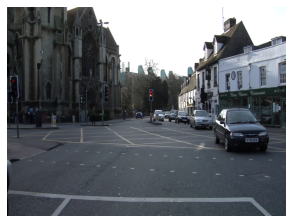

In [10]:
img_f = imageFileNames[5]
img = open_image(img_f)
img.show(figsize=(5,5))

In [11]:
img.data

tensor([[[0.2510, 0.2588, 0.2118,  ..., 0.9412, 0.9373, 0.9373],
         [0.2392, 0.2510, 0.2118,  ..., 0.9412, 0.9373, 0.9373],
         [0.2392, 0.2549, 0.2196,  ..., 0.9412, 0.9373, 0.9373],
         ...,
         [0.0157, 0.0314, 0.0353,  ..., 0.2039, 0.2039, 0.2039],
         [0.0196, 0.0275, 0.0392,  ..., 0.1882, 0.1961, 0.2000],
         [0.0314, 0.0196, 0.0392,  ..., 0.1804, 0.1843, 0.1882]],

        [[0.2588, 0.2667, 0.2157,  ..., 1.0000, 1.0000, 1.0000],
         [0.2471, 0.2588, 0.2157,  ..., 1.0000, 1.0000, 1.0000],
         [0.2471, 0.2627, 0.2235,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.0157, 0.0314, 0.0353,  ..., 0.2392, 0.2392, 0.2392],
         [0.0196, 0.0275, 0.0392,  ..., 0.2275, 0.2353, 0.2392],
         [0.0314, 0.0196, 0.0392,  ..., 0.2196, 0.2235, 0.2275]],

        [[0.2314, 0.2392, 0.2000,  ..., 1.0000, 1.0000, 1.0000],
         [0.2196, 0.2314, 0.2000,  ..., 1.0000, 1.0000, 1.0000],
         [0.2196, 0.2353, 0.2078,  ..., 1.0000, 1.0000, 1.

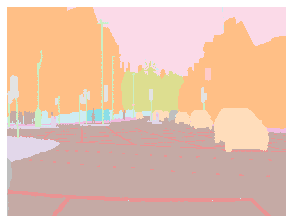

In [12]:
label_img_path = get_label_image(img_f)
mask = open_mask(label_img_path)
mask.show(figsize=(5,5))

In [13]:
img.data

tensor([[[0.2510, 0.2588, 0.2118,  ..., 0.9412, 0.9373, 0.9373],
         [0.2392, 0.2510, 0.2118,  ..., 0.9412, 0.9373, 0.9373],
         [0.2392, 0.2549, 0.2196,  ..., 0.9412, 0.9373, 0.9373],
         ...,
         [0.0157, 0.0314, 0.0353,  ..., 0.2039, 0.2039, 0.2039],
         [0.0196, 0.0275, 0.0392,  ..., 0.1882, 0.1961, 0.2000],
         [0.0314, 0.0196, 0.0392,  ..., 0.1804, 0.1843, 0.1882]],

        [[0.2588, 0.2667, 0.2157,  ..., 1.0000, 1.0000, 1.0000],
         [0.2471, 0.2588, 0.2157,  ..., 1.0000, 1.0000, 1.0000],
         [0.2471, 0.2627, 0.2235,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.0157, 0.0314, 0.0353,  ..., 0.2392, 0.2392, 0.2392],
         [0.0196, 0.0275, 0.0392,  ..., 0.2275, 0.2353, 0.2392],
         [0.0314, 0.0196, 0.0392,  ..., 0.2196, 0.2235, 0.2275]],

        [[0.2314, 0.2392, 0.2000,  ..., 1.0000, 1.0000, 1.0000],
         [0.2196, 0.2314, 0.2000,  ..., 1.0000, 1.0000, 1.0000],
         [0.2196, 0.2353, 0.2078,  ..., 1.0000, 1.0000, 1.

In [14]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

# Creating a data bunch

In [0]:
src = (SegmentationItemList
       .from_folder(path_img)
       .split_by_fname_file(path/'valid.txt')
       .label_from_func(get_label_image,  classes=codes))

In [0]:
bs=8
src_size = np.array(mask.size)
size = src_size//2
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

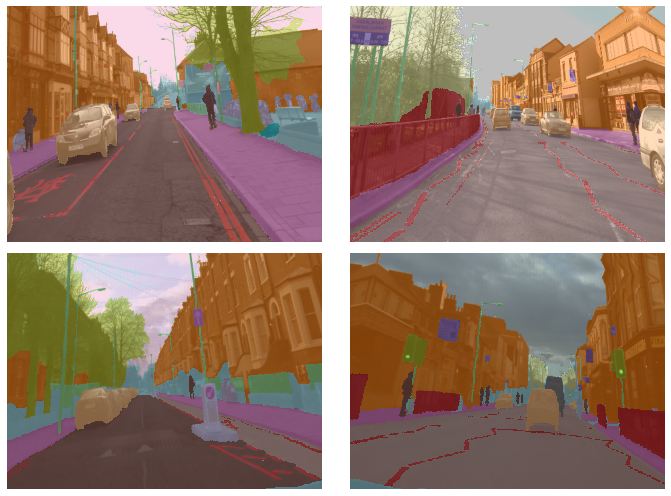

In [17]:
data.show_batch(2, figsize=(10,7))

# Training

In [0]:
learn = unet_learner(data, models.resnet34, metrics=accuracy)

In [19]:
lr_find(learn)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


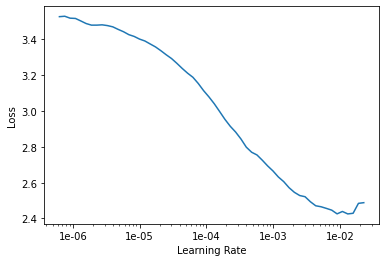

In [20]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(10, max_lr=1e-5)

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: ignored

In [0]:
learn.save('camvid-detection-stage-1')

# Model fine-tuning (Unfreezing, Fine-tuning and Differential Learning Rate)

In [0]:
learn.unfreeze()

In [0]:
lr_find(learn)

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(12, slice(1e-5,lr/5))

In [0]:
learn.save('camvid-detection-stage-2')

In [0]:
learn.show_results()

In [0]:
learn.export('camvid-detection-stage-2.pkl')

In [0]:
import os
plt.rcParams.update({'figure.max_open_warning': 0}) # avoid matplotlib warnings
rest = load_learner(path, 'camvid-detection-stage-2.pkl') # load our pre-trained model we just exported

for filename in os.listdir(path/'test'):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        img = open_image('test/' + filename)
        img = img.apply_tfms(tfms=get_transforms()[1], size=224, resize_method=3) # resize the images the same way a the pre-processing
        preds, idx, output = rest.predict(img) # get predictions for each class and show only the one > to our threshold
        d = dict({rest.data.classes[i]: round(to_np(p)*100,2) for i, p in enumerate(output) if p > 0.2})
        img.show(title=str(d))